In [102]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings   

In [103]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [104]:
train_original=train.copy() 
test_original=test.copy()

In [105]:
train.shape

(18288, 3)

In [106]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [107]:
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [108]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [109]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [110]:
train

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3


In [111]:
def applyer(x):
    if x.dayofweek == 5 or x.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

In [112]:
train

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0


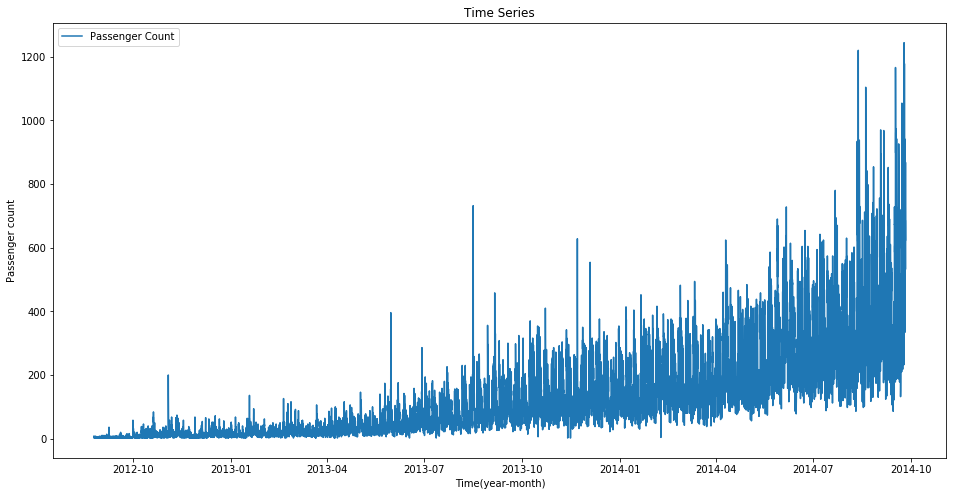

In [113]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high
After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

5) Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

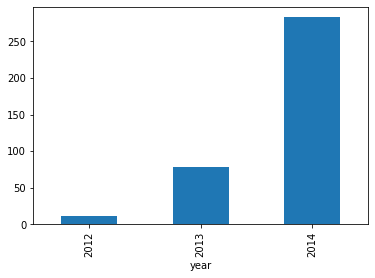

In [114]:
train.groupby('year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

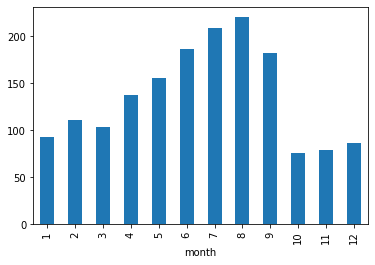

In [115]:
train.groupby('month')['Count'].mean().plot.bar()


Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

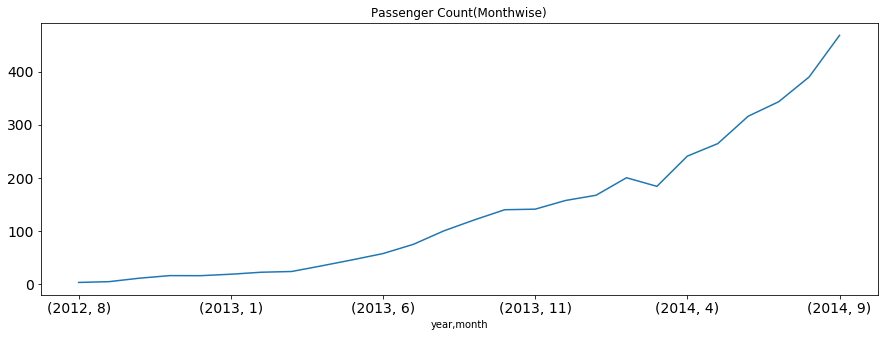

In [116]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

In [117]:
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let’s look at the daily mean of passenger count.

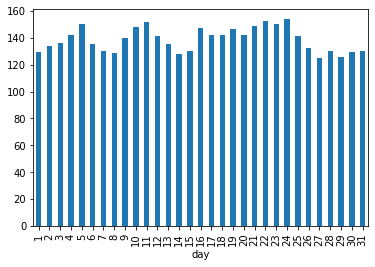

In [118]:
train.groupby('day')['Count'].mean().plot.bar()


We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

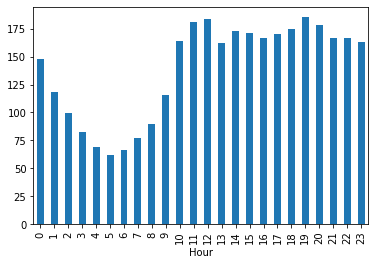

In [119]:
train.groupby('Hour')['Count'].mean().plot.bar()


It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

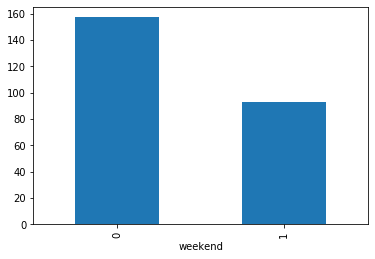

In [120]:
train.groupby('weekend')['Count'].mean().plot.bar()


It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day wise passenger count.

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

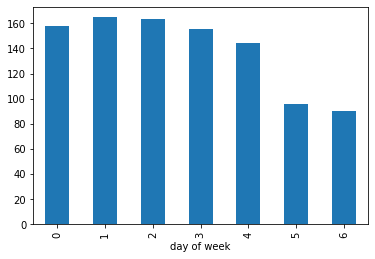

In [121]:
train.groupby('day of week')['Count'].mean().plot.bar()


From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [122]:
train=train.drop('ID',1)


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [123]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/home/pankush/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [124]:
daily

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0


In [125]:
hourly


,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [126]:
weekly

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714
...,...,...,...,...,...,...,...
2014-08-31,418.023810,2014.0,8.000000,28.000000,11.5,3.0,0.285714
2014-09-07,446.190476,2014.0,9.000000,4.000000,11.5,3.0,0.285714
2014-09-14,392.297619,2014.0,9.000000,11.000000,11.5,3.0,0.285714


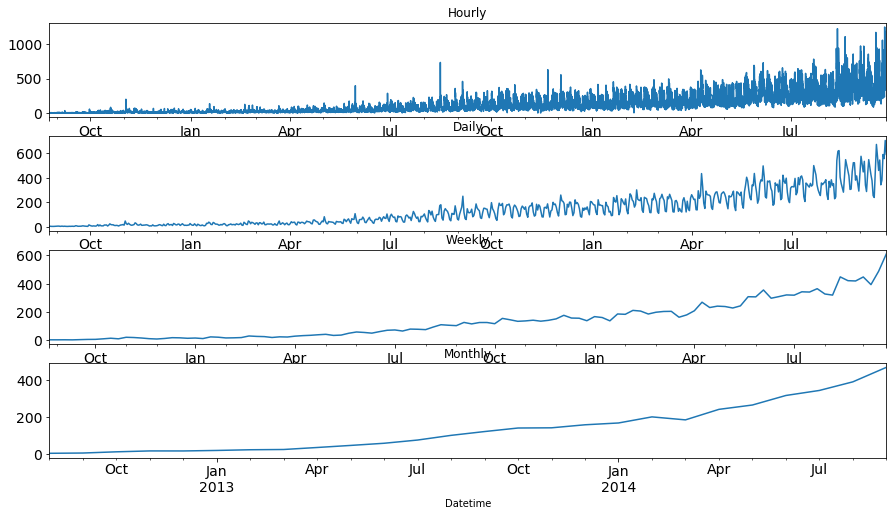

In [127]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [128]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

/home/pankush/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [129]:
train

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0


In [130]:
daily

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0


In [131]:
train.index > '2012-08-25'

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

1) Splitting the data into training and validation part

In [134]:
mask_train = (train.index > '2012-08-25') & (train.index <= '2014-06-24')
Train=train.loc[mask_train]
mask_valid=(train.index > '2014-06-25') & (train.index < '2014-09-25')
valid=train.loc[mask_valid]


We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

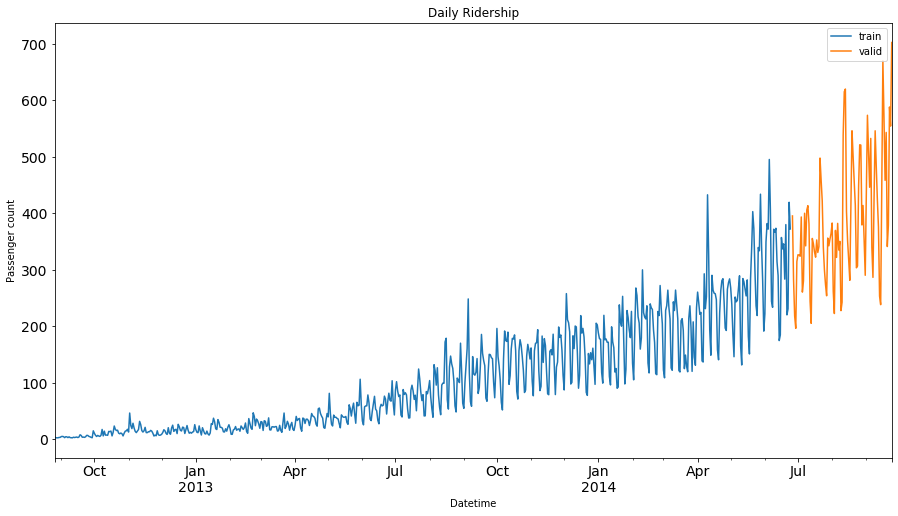

In [135]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model
We will discuss each of these methods in detail now.

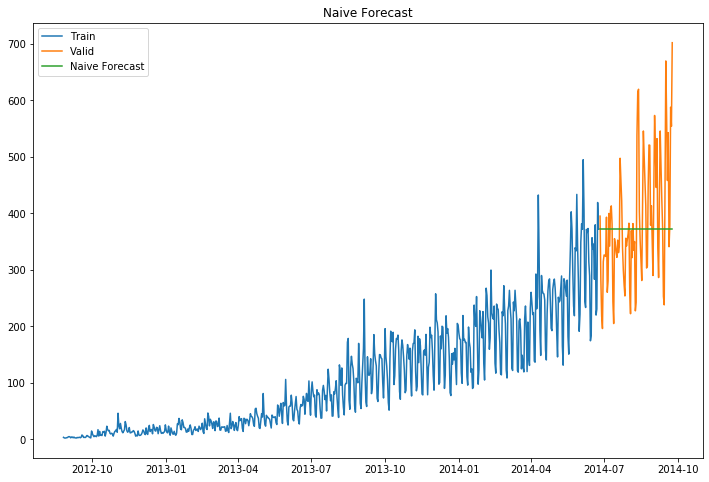

In [136]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [137]:
y_hat

,Count,year,month,day,Hour,day of week,weekend,naive
Datetime,,,,,,,,
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,372.166667
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,372.166667
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,372.166667
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,372.166667
2014-06-30,314.500000,2014.0,6.0,30.0,11.5,0.0,0.0,372.166667
...,...,...,...,...,...,...,...,...
2014-09-20,341.083333,2014.0,9.0,20.0,11.5,5.0,1.0,372.166667
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0,372.166667
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0,372.166667


In [138]:
# !pip3 install sklearn

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are.
The formula for rmse is:


rmse=sqrt∑i=1N1N(p−a)2



We will now calculate RMSE to check the accuracy of our model on validation data set.



In [139]:
# from sklearn.metrics import mean_squared_error 
# from math import sqrt 
# rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
# print(rms)

In [140]:
# from sklearn.metrics import mean_squared_error 

In [141]:
# from math import sqrt 
# rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
# print(rms)

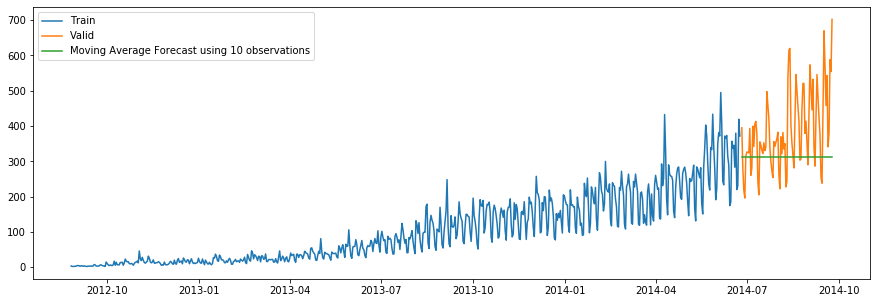

In [142]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
# y_hat_avg = valid.copy() 
# y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
# plt.figure(figsize=(15,5)) 
# plt.plot(Train['Count'], label='Train') 
# plt.plot(valid['Count'], label='Valid') 
# plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
# plt.legend(loc='best') 
# plt.show() 
# y_hat_avg = valid.copy() 
# y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
# plt.figure(figsize=(15,5)) 
# plt.plot(Train['Count'], label='Train') 
# plt.plot(valid['Count'], label='Valid') 
# plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
# plt.legend(loc='best') 
# plt.show()


iii) Simple Exponential Smoothing


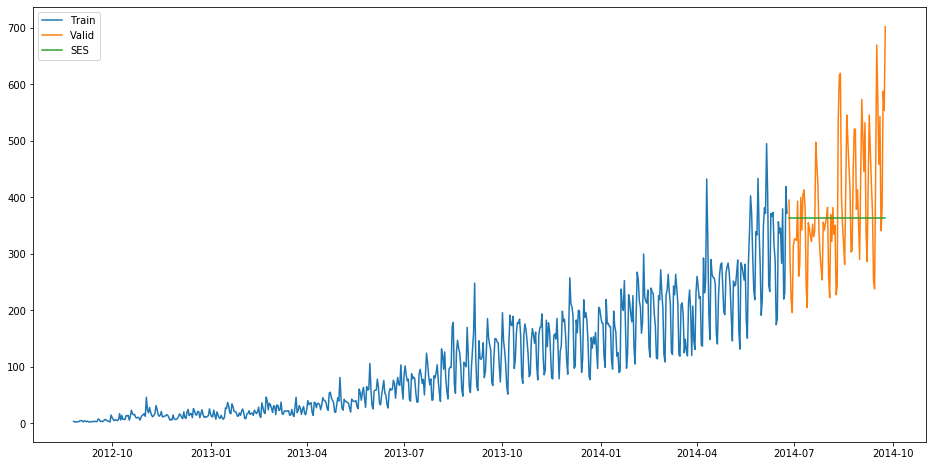

In [177]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 

plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [176]:
# !pip3 install statsmodels

In [170]:
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 


In [171]:
fit2

In [172]:
fit2.forecast(len(valid)) 

array([363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52249223,
       363.52249223, 363.52249223, 363.52249223, 363.52

In [181]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

NameError: name 'mean_squared_error' is not defined

In [180]:
from math import sqrt

iv) Holt’s Linear Trend Model


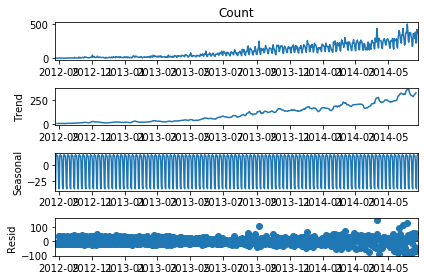

In [182]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

In [185]:
sm.tsa.stattools.adfuller(train.Count) 

(2.9863509590138535,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

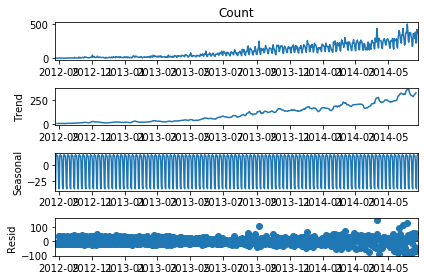

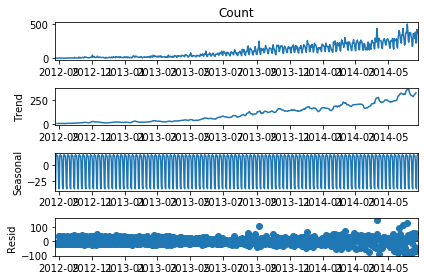

In [184]:
sm.tsa.seasonal_decompose(Train.Count).plot() 

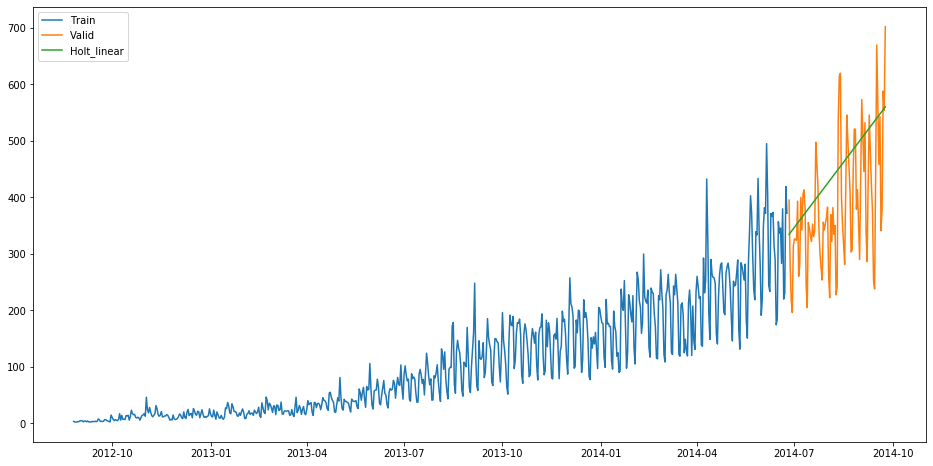

In [187]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [188]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

NameError: name 'mean_squared_error' is not defined

In [190]:
submission=pd.read_csv("sample_submission_LSeus50.csv")


In [191]:
predict=fit1.forecast(len(test))


In [192]:
test['prediction']=predict


In [193]:
test

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745
...,...,...,...,...,...,...
2015-04-22,23291.5,2015.0,4.0,22.0,11.5,856.365605
2015-04-23,23315.5,2015.0,4.0,23.0,11.5,858.873849
2015-04-24,23339.5,2015.0,4.0,24.0,11.5,861.382094


In [194]:
train_original

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


In [199]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 


In [200]:
train_original

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3.415620e-04
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,2.880454e-04
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,2.762403e-04
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,2.282327e-04
